<a href="https://colab.research.google.com/github/lucasresck/FGV-EMAp/blob/master/Introduction%20to%20Computer%20Graphics/Final%20project/Final%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [295]:
!pip install opencv-python

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import random
import time
from google.colab.patches import cv2_imshow

In [0]:
def medianFilter(img, height=0, width=0, r=1, rgb = False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_radius = red[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
                img2[h][w][0] = np.median(red_radius)
                green_radius = green[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
                img2[h][w][1] = np.median(green_radius)
                blue_radius = blue[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
                img2[h][w][2] = np.median(blue_radius)
        return img2
    
    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            radius = img[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
            img2[h][w] = np.median(radius)
    return img2

def meanFilter(img, height=0, width=0, r=1, rgb = False):
    if height == 0:
        height = len(img)
    if width == 0:
        width = int(np.floor(height / len(img) * len(img[0])))
    img = cv2.resize(img, (width, height))
    if rgb:
        red = img[:,:,0]
        green = img[:,:,1]
        blue = img[:,:,2]
        red2 = np.zeros((height, width))
        green2 = np.zeros((height, width))
        blue2 = np.zeros((height, width))
        img2 = np.zeros((height, width, 3))
        for h in range(0, height):
            for w in range(0, width):
                red_radius = red[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
                img2[h][w][0] = np.mean(red_radius)
                green_radius = green[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
                img2[h][w][1] = np.mean(green_radius)
                blue_radius = blue[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
                img2[h][w][2] = np.mean(blue_radius)
        return img2
    
    img2 = np.zeros((height, width))
    for h in range(0, height):
        for w in range(0, width):
            radius = img[np.maximum(0, h-r):np.minimum(h+r+1, height-1), np.maximum(0, w-r):np.minimum(w+r+1, width-1)]
            img2[h][w] = np.mean(radius)
    return img2

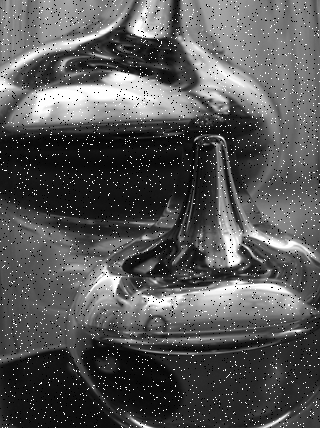

In [386]:
img1 = cv2.imread('/content/Noise_salt_and_pepper.png', cv2.IMREAD_UNCHANGED)
#https://upload.wikimedia.org/wikipedia/commons/f/f4/Noise_salt_and_pepper.png
cv2_imshow(img1)

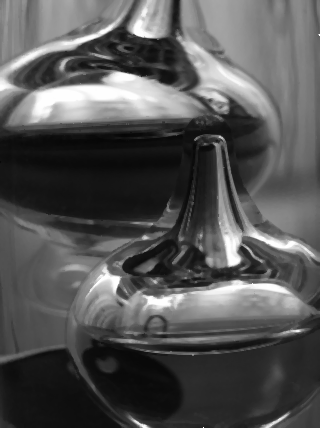

In [387]:
cv2_imshow(medianFilter(img1))

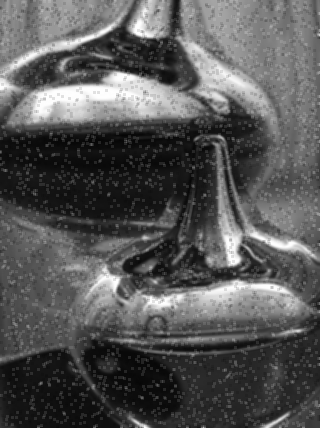

In [392]:
cv2_imshow(meanFilter(img1))

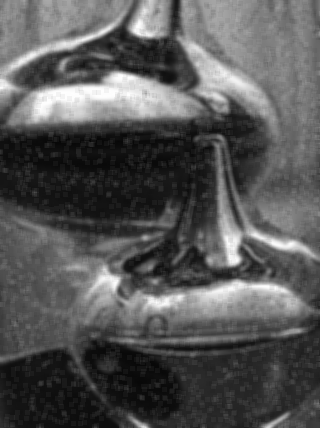

In [393]:
cv2_imshow(meanFilter(img1, r=2))

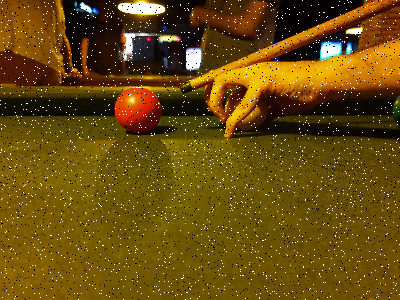

In [388]:
img2 = cv2.imread('/content/Before salt-and-pepper noise.jpg', cv2.IMREAD_UNCHANGED)
img2 = cv2.resize(img2, (400, 300))

random.seed(time.time())
p = 0.02

for h in range(len(img2)):
    for w in range(len(img2[0])):
        if random.random() < p:
            img2[h][w][0] = 0
            img2[h][w][1] = 0
            img2[h][w][2] = 0
        if random.random() > 1 - p:
            img2[h][w][0] = 255
            img2[h][w][1] = 255
            img2[h][w][2] = 255
            
cv2_imshow(img2)

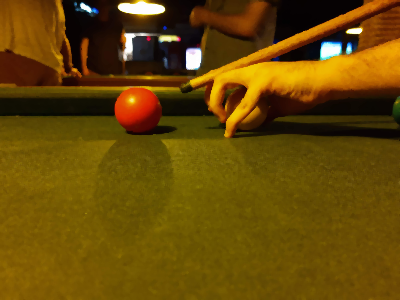

In [395]:
cv2_imshow(medianFilter(img2, rgb=True))

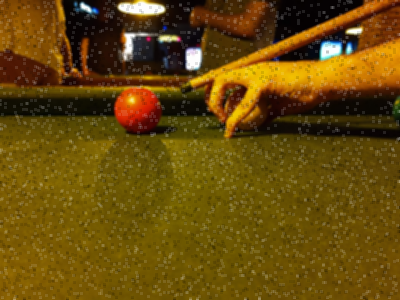

In [396]:
cv2_imshow(meanFilter(img2, rgb=True))

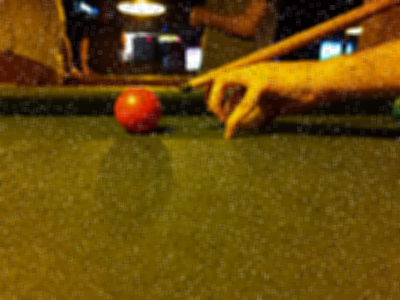

In [397]:
cv2_imshow(meanFilter(img2, rgb=True, r=2))